# GatedNet: Neural Network Decoding for Channel Codes

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from Model.DNN import DNNDecoder
from Model.RNN import RNNDecoder
from Model.GatedNet import GNNDecoder
%matplotlib inline

Using TensorFlow backend.


##  Build GatedNet Decoder

Train decoder under weak, medium, and strong impulsive noise seperately.

### Weak Impulsive Noise (alpha = 1.8)

In [2]:
GatedDecoder1_8 = GNNDecoder(alpha=1.8,GSNR=1,addPCL=False)
GatedDecoder1_8.train(epochs=2**16,batch_size=256,GSNR=1,verbose=0)
GatedDecoder1_8.train(epochs=2**16,batch_size=256,GSNR=5,verbose=0)
ber1_8=GatedDecoder1_8.test(alpha=1.8,GSNR_low=0,GSNR_up=5,interval=6,test_batch=100,num_words=10000)

inputs.shape: (?, 32) kernel.shape: (32, 8)
Tensor("dense_1_target:0", shape=(?, ?), dtype=float32) Tensor("dense_1/Sigmoid:0", shape=(?, 8), dtype=float32)
inputs.shape: (?, 32) kernel.shape: (32, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
modulator (Lambda)           (None, 16)                0         
_________________________________________________________________
noise (Lambda)               (None, 16)                0         
_________________________________________________________________
gated_dense_1 (GatedDense)   (None, 256)               17408     
_________________________________________________________________
gated_dense_2 (GatedDense)   (None, 128)               131584    
_________________________________________________________________
gated_dense_3 (GatedDense)   (None, 32)                16512     
_________________________________________________________________
dense_1

BER:  [0.0956875 0.0645625 0.0405375 0.0232375 0.0124875 0.0062625]


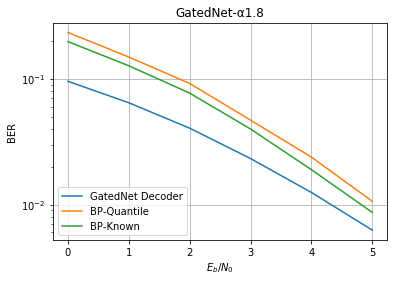

In [3]:
legend = []
print('BER: ',ber1_8)
SNRs=np.linspace(0,5,6)
plt.plot(SNRs, ber1_8)
legend.append('GatedNet Decoder') 

## Simulation results from matlab
BP_q=[0.234099763,0.1492177576,0.0919660471,0.0469560066,0.0238733877,0.0106203399 ]
BP_known=[0.1980021713  ,   0.1271546479   ,  0.0770838970  ,   0.0399218109  ,   0.0189543972,0.0086631011 ]
plt.plot(SNRs, BP_q)
legend.append('BP-Quantile') 
plt.plot(SNRs, BP_known)
legend.append('BP-Known') 

plt.legend(legend, loc=3)
plt.yscale('log')
plt.xlabel('$E_b/N_0$') 
plt.ylabel('BER')
plt.title('GatedNet-α1.8')
plt.grid(True)
plt.show()


### Medium Impulsive Noise (alpha = 1.5)

In [4]:
GatedDecoder1_5 = GNNDecoder(alpha=1.5,GSNR=1)
GatedDecoder1_5.train(epochs=2**16,batch_size=256,GSNR=1,verbose=0)
GatedDecoder1_5.train(epochs=2**16,batch_size=256,GSNR=5,verbose=0)
ber1_5=GatedDecoder1_5.test(alpha=1.5,GSNR_low=0,GSNR_up=5,interval=6,test_batch=100,num_words=10000)

inputs.shape: (?, 32) kernel.shape: (32, 8)
Tensor("dense_2_target:0", shape=(?, ?), dtype=float32) Tensor("dense_2/Sigmoid:0", shape=(?, 8), dtype=float32)
inputs.shape: (?, 32) kernel.shape: (32, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
modulator (Lambda)           (None, 16)                0         
_________________________________________________________________
noise (Lambda)               (None, 16)                0         
_________________________________________________________________
gated_dense_4 (GatedDense)   (None, 256)               17408     
_________________________________________________________________
gated_dense_5 (GatedDense)   (None, 128)               131584    
_________________________________________________________________
gated_dense_6 (GatedDense)   (None, 32)                16512     
_________________________________________________________________
dense_2

BER:  [0.1009625 0.074     0.0515875 0.0344    0.0225    0.0147125]


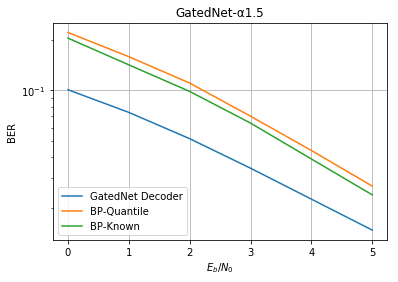

In [5]:
legend = []
print('BER: ',ber1_5)
SNRs=np.linspace(0,5,6)
plt.plot(SNRs, ber1_5)
legend.append('GatedNet Decoder') 

## Simulation results from matlab
BP_q=[0.221545025140942 ,0.158912969476909  ,   0.110642433472267  ,   0.0702048466290059   ,  0.0438724748747941,
       0.0268991605347704]
BP_known=[0.205058717253839,0.142041248016922,0.0986589684940604,0.0638810839127536,0.0390340130101222,
       0.0238643448828717]
plt.plot(SNRs, BP_q)
legend.append('BP-Quantile') 
plt.plot(SNRs, BP_known)
legend.append('BP-Known') 

plt.legend(legend, loc=3)
plt.yscale('log')
plt.xlabel('$E_b/N_0$') 
plt.ylabel('BER')   
plt.title('GatedNet-α1.5')
plt.grid(True)
plt.show()


### Strong Impulsive Noise (alpha = 1.2)

In [6]:
GatedDecoder1_2 = GNNDecoder(alpha=1.2,GSNR=1)
GatedDecoder1_2.train(epochs=2**16,batch_size=256,GSNR=1,verbose=0)
GatedDecoder1_2.train(epochs=2**16,batch_size=256,GSNR=5,verbose=0)
ber1_2=GatedDecoder1_2.test(alpha=1.2,GSNR_low=0,GSNR_up=5,interval=6,test_batch=100,num_words=10000)

inputs.shape: (?, 32) kernel.shape: (32, 8)
Tensor("dense_3_target:0", shape=(?, ?), dtype=float32) Tensor("dense_3/Sigmoid:0", shape=(?, 8), dtype=float32)
inputs.shape: (?, 32) kernel.shape: (32, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
modulator (Lambda)           (None, 16)                0         
_________________________________________________________________
noise (Lambda)               (None, 16)                0         
_________________________________________________________________
gated_dense_7 (GatedDense)   (None, 256)               17408     
_________________________________________________________________
gated_dense_8 (GatedDense)   (None, 128)               131584    
_________________________________________________________________
gated_dense_9 (GatedDense)   (None, 32)                16512     
_________________________________________________________________
dense_3

[0.1119375 0.0889875 0.070275  0.053925  0.0404625 0.030325 ]


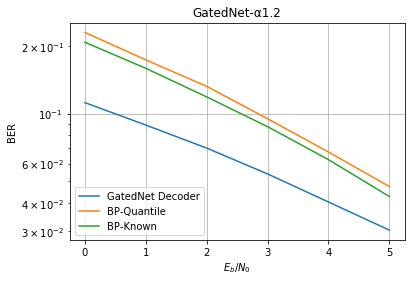

In [7]:
legend = []
print(ber1_2)
SNRs=np.linspace(0,5,6)
plt.plot(SNRs, ber1_2)
legend.append('GatedNet Decoder') 

## Simulation results from matlab
BP_q=[0.229818335121876 ,    0.173533483639023   ,  0.132289914979567  ,   0.0949579607396060   ,  0.0675087439172749 , 
       0.0474309467563147]
BP_known=[0.207811659881711, 0.159101725163593, 0.118727118492723, 0.0875295862919625 , 0.0624385274694394 ,
       0.0427918153470280]
plt.plot(SNRs, BP_q)
legend.append('BP-Quantile') 
plt.plot(SNRs, BP_known)
legend.append('BP-Known') 

plt.legend(legend, loc=3)
plt.yscale('log')
plt.xlabel('$E_b/N_0$') 
plt.ylabel('BER')    
plt.title('GatedNet-α1.2')
plt.grid(True)
plt.show()


## Compare DNN Decoder with GatedNet Decoder

In [8]:
DNN = DNNDecoder(alpha=1.2,GSNR=1)
DNN.train(epochs=2**16,batch_size=256,GSNR=1,verbose=0)
DNN.train(epochs=2**16,batch_size=256,GSNR=5,verbose=0)
ber_DNN=DNN.test(alpha=1.2,GSNR_low=0,GSNR_up=5,interval=6,test_batch=100,num_words=10000)

inputs.shape: (?, 16) kernel.shape: (16, 256)
inputs.shape: (?, 256) kernel.shape: (256, 128)
inputs.shape: (?, 128) kernel.shape: (128, 32)
inputs.shape: (?, 32) kernel.shape: (32, 8)
Tensor("dense_7_target:0", shape=(?, ?), dtype=float32) Tensor("dense_7/Sigmoid:0", shape=(?, 8), dtype=float32)
inputs.shape: (?, 16) kernel.shape: (16, 256)
inputs.shape: (?, 256) kernel.shape: (256, 128)
inputs.shape: (?, 128) kernel.shape: (128, 32)
inputs.shape: (?, 32) kernel.shape: (32, 8)
inputs.shape: (?, 16) kernel.shape: (16, 256)
inputs.shape: (?, 256) kernel.shape: (256, 128)
inputs.shape: (?, 128) kernel.shape: (128, 32)
inputs.shape: (?, 32) kernel.shape: (32, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
modulator (Lambda)           (None, 16)                0         
_________________________________________________________________
noise (Lambda)               (None, 16)                0         
__

[0.1356625 0.1152375 0.0976    0.0814875 0.0676    0.055925 ]


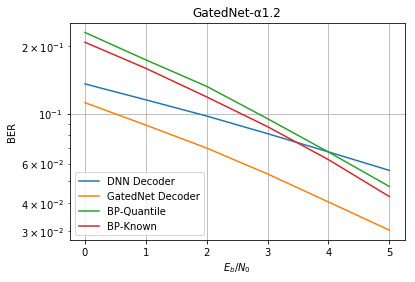

In [9]:
legend = []
print(ber_DNN)
SNRs=np.linspace(0,5,6)
plt.plot(SNRs, ber_DNN)
legend.append('DNN Decoder') 
plt.plot(SNRs, ber1_2)
legend.append('GatedNet Decoder') 
## Simulation results from matlab
BP_q=[0.229818335121876 ,    0.173533483639023   ,  0.132289914979567  ,   0.0949579607396060   ,  0.0675087439172749 , 
       0.0474309467563147]
BP_known=[0.207811659881711, 0.159101725163593, 0.118727118492723, 0.0875295862919625 , 0.0624385274694394 ,
       0.0427918153470280]
plt.plot(SNRs, BP_q)
legend.append('BP-Quantile') 
plt.plot(SNRs, BP_known)
legend.append('BP-Known') 

plt.legend(legend, loc=3)
plt.yscale('log')
plt.xlabel('$E_b/N_0$') 
plt.ylabel('BER')    
plt.title('GatedNet-α1.2')
plt.grid(True)
plt.show()

## Compare LSTM Decoder with GatedNet Decoder

In [10]:
lstmDecoder = RNNDecoder(alpha=1.2,GSNR=1,RNNtype='LSTM')
lstmDecoder.train(epochs=2**16,batch_size=256,GSNR=1,verbose=0)
lstmDecoder.train(epochs=2**16,batch_size=256,GSNR=5,verbose=0)
ber_lstm=lstmDecoder.test(alpha=1.2,GSNR_low=0,GSNR_up=5,interval=6,test_batch=100,num_words=10000)

inputs.shape: (?, 200) kernel.shape: (200, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
modulator (Lambda)           (None, None, 1)           0         
_________________________________________________________________
noise (Lambda)               (None, None, 1)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 200)         81600     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 1608      
Total params: 324,008
Trainable params: 324,008
Non-trainable params: 0
_________________________________________________________________
inputs.shape: (?, 200) kernel.shape: (200, 8)
(256, 16, 1) (256, 8)
Time Used:3943.7040963

[0.10929375, 0.0868175, 0.06738625, 0.0518625, 0.03920375, 0.02946375]


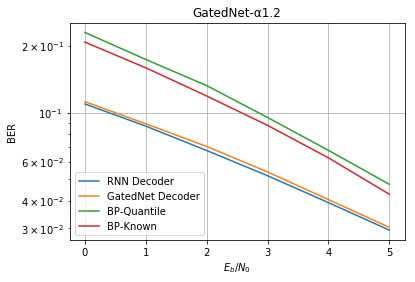

In [16]:
legend = []
print(ber_lstm)
SNRs=np.linspace(0,5,6)
plt.plot(SNRs, ber_lstm)
legend.append('RNN Decoder') 
plt.plot(SNRs, ber1_2)
legend.append('GatedNet Decoder') 
## Simulation results from matlab
BP_q=[0.229818335121876 ,    0.173533483639023   ,  0.132289914979567  ,   0.0949579607396060   ,  0.0675087439172749 , 
       0.0474309467563147]
BP_known=[0.207811659881711, 0.159101725163593, 0.118727118492723, 0.0875295862919625 , 0.0624385274694394 ,
       0.0427918153470280]
plt.plot(SNRs, BP_q)
legend.append('BP-Quantile') 
plt.plot(SNRs, BP_known)
legend.append('BP-Known') 

plt.legend(legend, loc=3)
plt.yscale('log')
plt.xlabel('$E_b/N_0$') 
plt.ylabel('BER')    
plt.title('GatedNet-α1.2')
plt.grid(True)
plt.show()

GatedNet Decoder has a competitive performance with RNNDeocder. However, the training time of LSTMDecoder is <b>three times</b> than GatedNet's. The parameters number is <b>twice</b> than GatedNet's.

|             |  LSTM  | GatedNet |
|:-----------:|:------:|:--------:|
| 2<sup>16</sup> epochs | 66 min |  23 min  |
| Parameters  | 324,008 | 165,768  |